In [315]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000) #데이터가 많을 때 생략되는 데이터 없이 최대 1000개까지
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', -1) #한 열의 넓이 (-1 => 데이터 최대길이에 맞춰서 보여줌)
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

C:\Users\SMHRD\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [316]:
dog = pd.read_csv('강아지 성향 분석을 위한 데이터 수집 설문조사.csv', encoding='utf-8')

In [317]:
dog.head()

,TIMESTAMP,☆☆☆☆추첨을통해 상품을 드리기 위해 연락처 또는 카톡 아이디를 입력해주세요!☆☆☆☆,name,sex,age,species,weight,size,walking,cut,dogmeet,humanmeet,test1,test2,test3,test4,test5,test6,test7,test8
0,2020-08-13 16:44,1056527937,구뽕이,여아,3,22,13,3,7,했어요,7,4,6.오지 않는다.,3.물건을 쫒아가서 물건을 들고 돌아온다.,5.바닥에 누워 손을 핥는다.,2.강하게 저항한다.,2. 6~7초 사이에 반응,3. 소리 나는 방향을 향해 호기심을 보이며 다가간다.,2. 쳐다보고 달려가 공격하듯이 문다.,1. 격렬하게 저항하고 손을 문다.
1,2020-08-13 16:46,1022846189,루비,여아,4,28,5,2,1,안했어요,1,1,6.오지 않는다.,1.물건을 쫒아가서 입에 물고 달아난다.,4.몸을 숙이며 손을 핥는다.,6.저항하지 않고 얼어 있다.,4. 2~4초 사이에 반응,2. 소리 나는 방향을 향해 짖는다.,4. 쳐다보고 짖는다. 이때 꼬리를 감춘다.,2. 격렬하게 몸을 흔들며 저항한다.
2,2020-08-13 16:46,yenayoo,김코,여아,12,29,6,2,3,했어요,7,10,6.오지 않는다.,6.물건을 전혀 쫒지않는다.,5.바닥에 누워 손을 핥는다.,6.저항하지 않고 얼어 있다.,5. 1~2초 사이에 반응,4. 소리 나는 방향을 바라본다.,1. 8~10초 사이에 반응,2. 격렬하게 몸을 흔들며 저항한다.
3,2020-08-13 16:46,010-2449-7602,옥찌,여아,3,7,1,1,1,안했어요,2,1,1.꼬리를 들고 다가와 뛰어오르며 손을 깨문다.,3.물건을 쫒아가서 물건을 들고 돌아온다.,4.몸을 숙이며 손을 핥는다.,6.저항하지 않고 얼어 있다.,3. 5~6초 사이에 반응,2. 소리 나는 방향을 향해 짖는다.,2. 쳐다보고 달려가 공격하듯이 문다.,2. 격렬하게 몸을 흔들며 저항한다.
4,2020-08-13 16:47,1088772725,보리,여아,6,31,3,1,4,안했어요,2,2,4.꼬리를 내리고 다가온다.,1.물건을 쫒아가서 입에 물고 달아난다.,4.몸을 숙이며 손을 핥는다.,4.저항하지 않고 편안하게 앉는다.,5. 1~2초 사이에 반응,5. 놀라 뒤로 물러나 숨는다.,3. 호기심을 가지고 쳐다보며 물체를 탐색한다.,6. 저항하지 않고 눈을 피한다.


In [318]:
dog.drop('TIMESTAMP',axis=1,inplace=True)

In [319]:
dog.drop('☆☆☆☆추첨을통해 상품을 드리기 위해 연락처 또는 카톡 아이디를 입력해주세요!☆☆☆☆',axis=1,inplace=True)

In [320]:
dog.drop('name',axis=1,inplace=True)

In [321]:
dog

,sex,age,species,weight,size,walking,cut,dogmeet,humanmeet,test1,test2,test3,test4,test5,test6,test7,test8
0,여아,3,22,13,3,7,했어요,7,4,6.오지 않는다.,3.물건을 쫒아가서 물건을 들고 돌아온다.,5.바닥에 누워 손을 핥는다.,2.강하게 저항한다.,2. 6~7초 사이에 반응,3. 소리 나는 방향을 향해 호기심을 보이며 다가간다.,2. 쳐다보고 달려가 공격하듯이 문다.,1. 격렬하게 저항하고 손을 문다.
1,여아,4,28,5,2,1,안했어요,1,1,6.오지 않는다.,1.물건을 쫒아가서 입에 물고 달아난다.,4.몸을 숙이며 손을 핥는다.,6.저항하지 않고 얼어 있다.,4. 2~4초 사이에 반응,2. 소리 나는 방향을 향해 짖는다.,4. 쳐다보고 짖는다. 이때 꼬리를 감춘다.,2. 격렬하게 몸을 흔들며 저항한다.
2,여아,12,29,6,2,3,했어요,7,10,6.오지 않는다.,6.물건을 전혀 쫒지않는다.,5.바닥에 누워 손을 핥는다.,6.저항하지 않고 얼어 있다.,5. 1~2초 사이에 반응,4. 소리 나는 방향을 바라본다.,1. 8~10초 사이에 반응,2. 격렬하게 몸을 흔들며 저항한다.
3,여아,3,7,1,1,1,안했어요,2,1,1.꼬리를 들고 다가와 뛰어오르며 손을 깨문다.,3.물건을 쫒아가서 물건을 들고 돌아온다.,4.몸을 숙이며 손을 핥는다.,6.저항하지 않고 얼어 있다.,3. 5~6초 사이에 반응,2. 소리 나는 방향을 향해 짖는다.,2. 쳐다보고 달려가 공격하듯이 문다.,2. 격렬하게 몸을 흔들며 저항한다.
4,여아,6,31,3,1,4,안했어요,2,2,4.꼬리를 내리고 다가온다.,1.물건을 쫒아가서 입에 물고 달아난다.,4.몸을 숙이며 손을 핥는다.,4.저항하지 않고 편안하게 앉는다.,5. 1~2초 사이에 반응,5. 놀라 뒤로 물러나 숨는다.,3. 호기심을 가지고 쳐다보며 물체를 탐색한다.,6. 저항하지 않고 눈을 피한다.
5,남아,1,28,3,1,3,했어요,1,4,2.꼬리를 들고 다가와 손을 핥는다.,3.물건을 쫒아가서 물건을 들고 돌아온다.,5.바닥에 누워 손을 핥는다.,5.저항하지 않고 손을 핥는다.,3. 5~6초 사이에 반응,5. 놀라 뒤로 물러나 숨는다.,3. 호기심을 가지고 쳐다보며 물체를 탐색한다.,5. 저항하지 않고 손을 핥는다.
6,남아,5,29,6,2,2,안했어요,2,2,2.꼬리를 들고 다가와 손을 핥는다.,1.물건을 쫒아가서 입에 물고 달아난다.,5.바닥에 누워 손을 핥는다.,3.저항하다가 순응하고 핥는다.,5. 1~2초 사이에 반응,1. 소리 나는 방향을 찾아 짖으며 다가간다.,3. 호기심을 가지고 쳐다보며 물체를 탐색한다.,3. 저항과 순응을 반복한다.
7,남아,2,15,3,1,1,했어요,6,4,3.꼬리를 들고 다가온다.,1.물건을 쫒아가서 입에 물고 달아난다.,3.사람에게 안기며 얼굴을 핥으려 한다.,5.저항하지 않고 손을 핥는다.,3. 5~6초 사이에 반응,5. 놀라 뒤로 물러나 숨는다.,2. 쳐다보고 달려가 공격하듯이 문다.,3. 저항과 순응을 반복한다.
8,남아,20,28,3,1,3,했어요,2,2,2.꼬리를 들고 다가와 손을 핥는다.,4.물건을 쫒아가기는 하지만 그냥 두고 돌아온다.,4.몸을 숙이며 손을 핥는다.,6.저항하지 않고 얼어 있다.,4. 2~4초 사이에 반응,2. 소리 나는 방향을 향해 짖는다.,3. 호기심을 가지고 쳐다보며 물체를 탐색한다.,2. 격렬하게 몸을 흔들며 저항한다.
9,남아,9,29,5,2,1,했어요,1,1,2.꼬리를 들고 다가와 손을 핥는다.,1.물건을 쫒아가서 입에 물고 달아난다.,5.바닥에 누워 손을 핥는다.,4.저항하지 않고 편안하게 앉는다.,4. 2~4초 사이에 반응,1. 소리 나는 방향을 찾아 짖으며 다가간다.,2. 쳐다보고 달려가 공격하듯이 문다.,1. 격렬하게 저항하고 손을 문다.


In [322]:
le = LabelEncoder()

In [323]:
le.fit(dog.sex)

LabelEncoder()

In [324]:
le.classes_

array(['남아', '여아'], dtype=object)

In [325]:
le.transform(['남아','여아'])

array([0, 1], dtype=int64)

In [326]:
dog['sex']= le.transform(dog.sex)

In [327]:
dog

,sex,age,species,weight,size,walking,cut,dogmeet,humanmeet,test1,test2,test3,test4,test5,test6,test7,test8
0,1,3,22,13,3,7,했어요,7,4,6.오지 않는다.,3.물건을 쫒아가서 물건을 들고 돌아온다.,5.바닥에 누워 손을 핥는다.,2.강하게 저항한다.,2. 6~7초 사이에 반응,3. 소리 나는 방향을 향해 호기심을 보이며 다가간다.,2. 쳐다보고 달려가 공격하듯이 문다.,1. 격렬하게 저항하고 손을 문다.
1,1,4,28,5,2,1,안했어요,1,1,6.오지 않는다.,1.물건을 쫒아가서 입에 물고 달아난다.,4.몸을 숙이며 손을 핥는다.,6.저항하지 않고 얼어 있다.,4. 2~4초 사이에 반응,2. 소리 나는 방향을 향해 짖는다.,4. 쳐다보고 짖는다. 이때 꼬리를 감춘다.,2. 격렬하게 몸을 흔들며 저항한다.
2,1,12,29,6,2,3,했어요,7,10,6.오지 않는다.,6.물건을 전혀 쫒지않는다.,5.바닥에 누워 손을 핥는다.,6.저항하지 않고 얼어 있다.,5. 1~2초 사이에 반응,4. 소리 나는 방향을 바라본다.,1. 8~10초 사이에 반응,2. 격렬하게 몸을 흔들며 저항한다.
3,1,3,7,1,1,1,안했어요,2,1,1.꼬리를 들고 다가와 뛰어오르며 손을 깨문다.,3.물건을 쫒아가서 물건을 들고 돌아온다.,4.몸을 숙이며 손을 핥는다.,6.저항하지 않고 얼어 있다.,3. 5~6초 사이에 반응,2. 소리 나는 방향을 향해 짖는다.,2. 쳐다보고 달려가 공격하듯이 문다.,2. 격렬하게 몸을 흔들며 저항한다.
4,1,6,31,3,1,4,안했어요,2,2,4.꼬리를 내리고 다가온다.,1.물건을 쫒아가서 입에 물고 달아난다.,4.몸을 숙이며 손을 핥는다.,4.저항하지 않고 편안하게 앉는다.,5. 1~2초 사이에 반응,5. 놀라 뒤로 물러나 숨는다.,3. 호기심을 가지고 쳐다보며 물체를 탐색한다.,6. 저항하지 않고 눈을 피한다.
5,0,1,28,3,1,3,했어요,1,4,2.꼬리를 들고 다가와 손을 핥는다.,3.물건을 쫒아가서 물건을 들고 돌아온다.,5.바닥에 누워 손을 핥는다.,5.저항하지 않고 손을 핥는다.,3. 5~6초 사이에 반응,5. 놀라 뒤로 물러나 숨는다.,3. 호기심을 가지고 쳐다보며 물체를 탐색한다.,5. 저항하지 않고 손을 핥는다.
6,0,5,29,6,2,2,안했어요,2,2,2.꼬리를 들고 다가와 손을 핥는다.,1.물건을 쫒아가서 입에 물고 달아난다.,5.바닥에 누워 손을 핥는다.,3.저항하다가 순응하고 핥는다.,5. 1~2초 사이에 반응,1. 소리 나는 방향을 찾아 짖으며 다가간다.,3. 호기심을 가지고 쳐다보며 물체를 탐색한다.,3. 저항과 순응을 반복한다.
7,0,2,15,3,1,1,했어요,6,4,3.꼬리를 들고 다가온다.,1.물건을 쫒아가서 입에 물고 달아난다.,3.사람에게 안기며 얼굴을 핥으려 한다.,5.저항하지 않고 손을 핥는다.,3. 5~6초 사이에 반응,5. 놀라 뒤로 물러나 숨는다.,2. 쳐다보고 달려가 공격하듯이 문다.,3. 저항과 순응을 반복한다.
8,0,20,28,3,1,3,했어요,2,2,2.꼬리를 들고 다가와 손을 핥는다.,4.물건을 쫒아가기는 하지만 그냥 두고 돌아온다.,4.몸을 숙이며 손을 핥는다.,6.저항하지 않고 얼어 있다.,4. 2~4초 사이에 반응,2. 소리 나는 방향을 향해 짖는다.,3. 호기심을 가지고 쳐다보며 물체를 탐색한다.,2. 격렬하게 몸을 흔들며 저항한다.
9,0,9,29,5,2,1,했어요,1,1,2.꼬리를 들고 다가와 손을 핥는다.,1.물건을 쫒아가서 입에 물고 달아난다.,5.바닥에 누워 손을 핥는다.,4.저항하지 않고 편안하게 앉는다.,4. 2~4초 사이에 반응,1. 소리 나는 방향을 찾아 짖으며 다가간다.,2. 쳐다보고 달려가 공격하듯이 문다.,1. 격렬하게 저항하고 손을 문다.


In [328]:
le.fit(dog.cut)

LabelEncoder()

In [329]:
le.classes_

array(['안했어요', '했어요'], dtype=object)

In [330]:
le.transform(dog.cut)

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1])

In [331]:
dog['cut']=le.transform(dog.cut)

In [332]:
le.fit(dog.test1)

LabelEncoder()

In [333]:
le.classes_

array(['1.꼬리를 들고 다가와 뛰어오르며 손을 깨문다.', '2.꼬리를 들고 다가와 손을 핥는다.',
       '3.꼬리를 들고 다가온다.', '4.꼬리를 내리고 다가온다.', '5.꼬리를 내리고 다가오면서 약간 머뭇거린다.',
       '6.오지 않는다.'], dtype=object)

In [334]:
dog['test1']=le.transform(dog.test1)

In [335]:
le.fit(dog.test2)

LabelEncoder()

In [336]:
dog['test2']=le.transform(dog.test2)

In [337]:
le.fit(dog.test3)

LabelEncoder()

In [338]:
dog['test3']=le.transform(dog.test3)

In [339]:
le.fit(dog.test4)

LabelEncoder()

In [340]:
dog['test4']=le.transform(dog.test4)

In [341]:
le.fit(dog.test5)

LabelEncoder()

In [342]:
dog['test5']=le.transform(dog.test5)

In [343]:
le.fit(dog.test6)

LabelEncoder()

In [344]:
dog['test6']=le.transform(dog.test6)

In [345]:
le.fit(dog.test7)

LabelEncoder()

In [346]:
dog['test7']=le.transform(dog.test7)

In [347]:
le.fit(dog.test8)

LabelEncoder()

In [348]:
dog['test8']=le.transform(dog.test8)

In [349]:
le.fit(dog.walking)

LabelEncoder()

In [350]:
dog['walking']=le.transform(dog.walking)

In [351]:
dog

,sex,age,species,weight,size,walking,cut,dogmeet,humanmeet,test1,test2,test3,test4,test5,test6,test7,test8
0,1,3,22,13,3,10,1,7,4,5,2,4,1,1,2,1,0
1,1,4,28,5,2,1,0,1,1,5,0,3,5,3,1,3,1
2,1,12,29,6,2,6,1,7,10,5,5,4,5,4,3,0,1
3,1,3,7,1,1,1,0,2,1,0,2,3,5,2,1,1,1
4,1,6,31,3,1,7,0,2,2,3,0,3,3,4,4,2,5
5,0,1,28,3,1,6,1,1,4,1,2,4,4,2,4,2,4
6,0,5,29,6,2,5,0,2,2,1,0,4,2,4,0,2,2
7,0,2,15,3,1,1,1,6,4,2,0,2,4,2,4,1,2
8,0,20,28,3,1,6,1,2,2,1,3,3,5,3,1,2,1
9,0,9,29,5,2,1,1,1,1,1,0,4,3,3,0,1,0


In [352]:
test=dog.loc[:,'test1':]

In [353]:
test

,test1,test2,test3,test4,test5,test6,test7,test8
0,5,2,4,1,1,2,1,0
1,5,0,3,5,3,1,3,1
2,5,5,4,5,4,3,0,1
3,0,2,3,5,2,1,1,1
4,3,0,3,3,4,4,2,5
5,1,2,4,4,2,4,2,4
6,1,0,4,2,4,0,2,2
7,2,0,2,4,2,4,1,2
8,1,3,3,5,3,1,2,1
9,1,0,4,3,3,0,1,0


In [354]:
testScale = StandardScaler()
print(testScale.fit(test))
test_standardScaled = testScale.transform(test)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [355]:
pca_test = PCA(n_components = 2)
principalComponents = pca_test.fit_transform(test_standardScaled)
test_principalDf = pd.DataFrame(data = principalComponents
             , columns = ['test component 1', 'test component 2'])

In [356]:
test_kmeans = KMeans(n_clusters=10).fit(test_principalDf)  ##테스트 잘라서 프레딕트 하면됨

In [357]:
dog.drop('test1',axis=1,inplace=True)

In [358]:
dog.drop('test2',axis=1,inplace=True)

In [359]:
dog.drop('test3',axis=1,inplace=True)

In [360]:
dog.drop('test4',axis=1,inplace=True)

In [361]:
dog.drop('test5',axis=1,inplace=True)

In [362]:
dog.drop('test6',axis=1,inplace=True)

In [363]:
dog.drop('test7',axis=1,inplace=True)

In [364]:
dog.drop('test8',axis=1,inplace=True)

In [365]:
dog['character']=test_kmeans.labels_

In [366]:
dog   ### test 전처리 후 dogmain 에 다시 붙이기

,sex,age,species,weight,size,walking,cut,dogmeet,humanmeet,character
0,1,3,22,13,3,10,1,7,4,2
1,1,4,28,5,2,1,0,1,1,6
2,1,12,29,6,2,6,1,7,10,1
3,1,3,7,1,1,1,0,2,1,0
4,1,6,31,3,1,7,0,2,2,0
5,0,1,28,3,1,6,1,1,4,0
6,0,5,29,6,2,5,0,2,2,6
7,0,2,15,3,1,1,1,6,4,8
8,0,20,28,3,1,6,1,2,2,6
9,0,9,29,5,2,1,1,1,1,6


In [367]:
mainScale = StandardScaler()
print(mainScale.fit(dog))
main_standardScaled = mainScale.transform(dog)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [368]:
pca_main = PCA(n_components = 2)
main_principalComponents = pca_main.fit_transform(main_standardScaled)
main_principalDf = pd.DataFrame(data = main_principalComponents
             , columns = ['main component 1', 'main component 2'])

In [369]:
main_kmeans = KMeans(n_clusters=8).fit(main_principalDf)  ##테스트 잘라서 프레딕트 하면됨

In [370]:
main_kmeans.labels_

array([6, 3, 1, 3, 3, 5, 5, 2, 2, 5, 5, 3, 5, 5, 5, 2, 5, 5, 0, 2, 4, 1,
       4, 1, 1, 5, 5, 3, 1, 6, 1, 2, 2, 0, 3, 3, 6, 4, 3, 2, 2, 2, 2, 3,
       5, 3, 3, 6, 6, 3, 3, 6, 3, 5, 1, 2, 1, 1, 0, 2, 1, 3, 2, 6, 6, 6,
       1, 2, 1, 2, 3, 2, 1, 4, 1, 6, 5, 6, 1, 6, 1, 6, 1, 4, 4, 5, 1, 5,
       4, 0, 4, 6, 6, 6, 6, 6, 5, 7, 7, 3, 0, 0, 4, 5, 0, 6, 0, 4, 5, 0,
       7, 4, 5, 6, 2, 0, 1, 6, 1, 4, 1, 0, 4, 4, 4, 1, 0, 1, 2, 6, 2, 0,
       7, 3, 6, 2, 1, 5, 5, 5])

In [371]:
main_principalDf['character']=main_kmeans.labels_

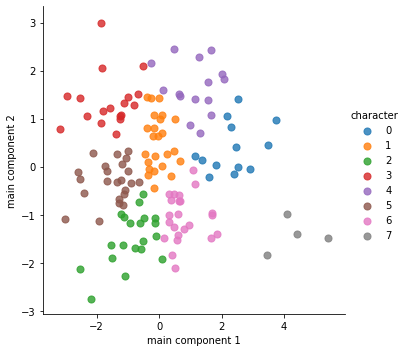

In [372]:
sns.lmplot(x="main component 1", y="main component 2", data=main_principalDf,scatter_kws={"s":50},
         fit_reg=False, hue="character")

### 플라스크 연결

In [373]:
def preprocessing1(df):
    fin_test=df.loc[:,'GAE_TEST1':]
    db_test = testScale.transform(fin_test)
    db_test_compo = pca_test.transform(db_test)
    db_test_principalDf = pd.DataFrame(data = db_test_compo
             , columns = ['test component 1', 'test component 2'])
    db_test_kmeans=test_kmeans.predict(db_test_principalDf)
    df.drop('GAE_TEST1',axis=1,inplace=True)
    df.drop('GAE_TEST2',axis=1,inplace=True)
    df.drop('GAE_TEST3',axis=1,inplace=True)
    df.drop('GAE_TEST4',axis=1,inplace=True)
    df.drop('GAE_TEST5',axis=1,inplace=True)
    df.drop('GAE_TEST6',axis=1,inplace=True)
    df.drop('GAE_TEST7',axis=1,inplace=True)
    df.drop('GAE_TEST8',axis=1,inplace=True)
    df['character']=db_test_kmeans
    return df

In [374]:
def preprocessing(test):

    test.drop('MEM_MAIL',axis=1,inplace=True)
    test.drop('GAE_IMG',axis=1,inplace=True)
    test.drop('GAE_NAME',axis=1,inplace=True)
    db_main = mainScale.transform(test)
    db_main_compo = pca_main.transform(db_main)
    db_main_principalDf = pd.DataFrame(data = db_main_compo
             , columns = ['main component 1', 'main component 2'])
    db_main_kmeans=main_kmeans.predict(db_main_principalDf)
    return db_main_kmeans

In [ ]:
from flask import Flask # 플라스크 클래스 임포트
from flask import request,redirect
import pickle #데이터 저장/로딩을 위한 모듈
import pandas as pd
import numpy as np
!pip install cx_Oracle --upgrade
import cx_Oracle
import time

app = Flask(__name__)#내장변수 name을 이용해 서버를 구동시키는 객체 생성

@app.route("/predict/predict", methods=['GET'])
def predict_survived() :
    if request.method == 'GET' : 
        print(request.args)
        dsn = cx_Oracle.makedsn("localhost", 1521, "xe")
        db = cx_Oracle.connect("hr", "hr", dsn)
        cursor = db.cursor()
        old_raw = 0
        cursor.execute("""
        select *
        from gae_INFO"""
        )
        value1 = request.args['item_id']
        print(type(value1))
        df = pd.read_sql("select * from gae_info where MEM_MAIL='"+value1+"'", con=db )
        display(df)
        
        test=preprocessing1(df)
        
        main = preprocessing(test)
        main2 = str(main[0])
        
        print(type(main2))
        
        execute = """insert into GAE_GROUP values(:MEM_MAIL,:GAE_GROUP)"""
        #cursor.execute(execute, {'MEM_MAIL':value1, 'GAE_GROUP':main[0]})
        #execute = """insert into GAE_GROUP values(%s, %s)"""
        cursor.execute(execute, [value1, main2])
        db.commit()
        
        return redirect("http://localhost:8082/B2A4TEAM/index.jsp")

if __name__ == "__main__" :   # .py 파일에서 main 함수 역할하는 코드
    app.run(host="localhost",port="9000")

Requirement already up-to-date: cx_Oracle in c:\users\smhrd\anaconda3\lib\site-packages (8.0.0)
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:9000/ (Press CTRL+C to quit)


ImmutableMultiDict([('item_id', 'sfesfsef')])
<class 'str'>


,MEM_MAIL,GAE_IMG,GAE_NAME,GAE_SEX,GAE_AGE,GAE_SPECIES,GAE_WEIGHT,GAE_SIZE,GAE_WALKING,GAE_CUT,GAE_DOG_REACT,GAE_HUMAN_REACT,GAE_TEST1,GAE_TEST2,GAE_TEST3,GAE_TEST4,GAE_TEST5,GAE_TEST6,GAE_TEST7,GAE_TEST8
0,sfesfsef,gaelogo19.ico,wefwe,1,1,1,22,4,13,1,1,1,3,4,5,5,3,3,3,2


127.0.0.1 - - [26/Aug/2020 14:54:41] "GET /predict/predict?item_id=sfesfsef HTTP/1.1" 302 -


<class 'str'>
ImmutableMultiDict([('item_id', 'jihoon2723@naver.com')])
<class 'str'>


,MEM_MAIL,GAE_IMG,GAE_NAME,GAE_SEX,GAE_AGE,GAE_SPECIES,GAE_WEIGHT,GAE_SIZE,GAE_WALKING,GAE_CUT,GAE_DOG_REACT,GAE_HUMAN_REACT,GAE_TEST1,GAE_TEST2,GAE_TEST3,GAE_TEST4,GAE_TEST5,GAE_TEST6,GAE_TEST7,GAE_TEST8
0,jihoon2723@naver.com,수진개3.png,망치,0,2,11,6,2,6,1,5,6,1,2,3,4,2,3,1,4


127.0.0.1 - - [26/Aug/2020 15:22:47] "GET /predict/predict?item_id=jihoon2723@naver.com HTTP/1.1" 302 -


<class 'str'>
ImmutableMultiDict([('item_id', '1')])
<class 'str'>


,MEM_MAIL,GAE_IMG,GAE_NAME,GAE_SEX,GAE_AGE,GAE_SPECIES,GAE_WEIGHT,GAE_SIZE,GAE_WALKING,GAE_CUT,GAE_DOG_REACT,GAE_HUMAN_REACT,GAE_TEST1,GAE_TEST2,GAE_TEST3,GAE_TEST4,GAE_TEST5,GAE_TEST6,GAE_TEST7,GAE_TEST8
0,1,만수8.png,만수,1,2,12,2,1,0,1,9,7,3,2,2,3,3,4,3,4


127.0.0.1 - - [26/Aug/2020 16:44:14] "GET /predict/predict?item_id=1 HTTP/1.1" 302 -


<class 'str'>
ImmutableMultiDict([('item_id', '2')])
<class 'str'>


,MEM_MAIL,GAE_IMG,GAE_NAME,GAE_SEX,GAE_AGE,GAE_SPECIES,GAE_WEIGHT,GAE_SIZE,GAE_WALKING,GAE_CUT,GAE_DOG_REACT,GAE_HUMAN_REACT,GAE_TEST1,GAE_TEST2,GAE_TEST3,GAE_TEST4,GAE_TEST5,GAE_TEST6,GAE_TEST7,GAE_TEST8
0,2,gaelogo20.ico,보리,0,2,29,4,1,5,1,6,8,4,4,3,3,3,4,3,3


127.0.0.1 - - [26/Aug/2020 16:45:17] "GET /predict/predict?item_id=2 HTTP/1.1" 302 -


<class 'str'>
ImmutableMultiDict([('item_id', '3')])
<class 'str'>


,MEM_MAIL,GAE_IMG,GAE_NAME,GAE_SEX,GAE_AGE,GAE_SPECIES,GAE_WEIGHT,GAE_SIZE,GAE_WALKING,GAE_CUT,GAE_DOG_REACT,GAE_HUMAN_REACT,GAE_TEST1,GAE_TEST2,GAE_TEST3,GAE_TEST4,GAE_TEST5,GAE_TEST6,GAE_TEST7,GAE_TEST8
0,3,다운로드1.jpg,오이,1,4,17,3,1,5,0,6,8,0,0,0,0,0,0,0,0


127.0.0.1 - - [26/Aug/2020 16:46:26] "GET /predict/predict?item_id=3 HTTP/1.1" 302 -


<class 'str'>
